# <b>CS156 (Introduction to AI), Spring 2022</b>
# <u><b>Homework 7 submission</b></u>

### Roster Name: Austin Rivard
### Student ID: 015044445
### Email address: austin.rivard@sjsu.edu

##  <u>References and sources </u>

List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_digits

In [2]:
np.random.seed(42)

#### Code the solution

In [3]:
# 1. Load the data. 

X, Y = load_digits(return_X_y=True, as_frame=True)
X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [4]:
X = X.astype('float32') / 255
X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,0.019608,0.050980,0.035294,0.003922,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.023529,0.050980,0.039216,0.000000,0.000000,0.0
1,0.0,0.0,0.000000,0.047059,0.050980,0.019608,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.043137,0.062745,0.039216,0.000000,0.0
2,0.0,0.0,0.000000,0.015686,0.058824,0.047059,0.000000,0.0,0.0,0.000000,...,0.019608,0.0,0.0,0.000000,0.000000,0.011765,0.043137,0.062745,0.035294,0.0
3,0.0,0.0,0.027451,0.058824,0.050980,0.003922,0.000000,0.0,0.0,0.031373,...,0.035294,0.0,0.0,0.000000,0.027451,0.050980,0.050980,0.035294,0.000000,0.0
4,0.0,0.0,0.000000,0.003922,0.043137,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.007843,0.062745,0.015686,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,0.015686,0.039216,0.050980,0.023529,0.000000,0.0,0.0,0.003922,...,0.015686,0.0,0.0,0.000000,0.007843,0.054902,0.058824,0.035294,0.000000,0.0
1793,0.0,0.0,0.023529,0.062745,0.050980,0.043137,0.003922,0.0,0.0,0.000000,...,0.003922,0.0,0.0,0.000000,0.023529,0.062745,0.054902,0.023529,0.000000,0.0
1794,0.0,0.0,0.003922,0.043137,0.058824,0.003922,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.007843,0.035294,0.050980,0.023529,0.000000,0.0
1795,0.0,0.0,0.007843,0.039216,0.027451,0.000000,0.000000,0.0,0.0,0.000000,...,0.007843,0.0,0.0,0.000000,0.019608,0.047059,0.062745,0.047059,0.000000,0.0


In [5]:
Y

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int64

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [8]:
model_hidden_layer_sizes = {
    (400,150,50),
    (64,32,8),
    (32,16),
    (120,64,16),
    (320,120,32)
}
models = []
cross_val_scores = []
test_acc_scores = []

model1 = MLPClassifier(random_state=1, max_iter=10000)
model1.fit(X_train, Y_train)

models.append(model1)
cross_val_scores.append(cross_val_score(model1, X_train, Y_train, n_jobs=-1))
test_acc_scores.append(model1.score(X_test, Y_test))

for hidden_layer_sizes in model_hidden_layer_sizes:
  model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, random_state=1, max_iter=10000)
  model.fit(X_train, Y_train)
  cross_val_scores.append(cross_val_score(model, X_train, Y_train, n_jobs=-1))
  test_acc_scores.append(model.score(X_test, Y_test))
  models.append(model)

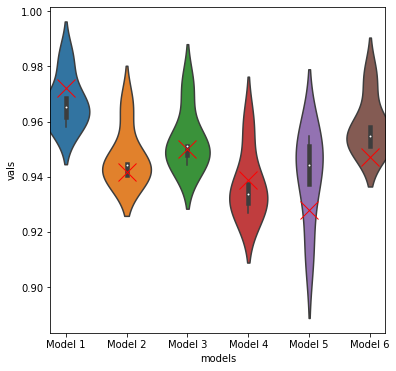

In [63]:
model_labels = [f'Model {i}' for i in range(1, 7)]
data = pd.DataFrame({'models': model_labels, 'vals': cross_val_scores})
data = data.explode('vals')
data['vals'] = data['vals'].astype('float32')
ax = sns.violinplot(x='models', y='vals', data=data)

plt.rcParams['figure.figsize'] = [6, 6]

ax.plot(model_labels, test_acc_scores, 'rx', scalex=False, scaley=False, ms=18)